In [30]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [31]:
iyr_data = Path('C:/Users/susan/ProjectOne/IYR.csv')
iyr_df = pd.read_csv(iyr_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

sp500_data = Path('C:/Users/susan/ProjectOne/SPY.csv')
sp500_df = pd.read_csv(sp500_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-01-02,250.179993
2019-01-03,244.210007
2019-01-04,252.389999
2019-01-07,254.380005
2019-01-08,256.769989


In [32]:
# New pivot table, columns are the closing prices for each ticker
combined_df = pd.concat([iyr_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order
combined_df.sort_index(inplace=True)

# Set column names
combined_df.columns = ["IYR", "S&P 500"]

# Display a few rows
combined_df.head()

,IYR,S&P 500
Date,,
2019-01-02,73.320000,250.179993
2019-01-03,73.790001,244.210007
2019-01-04,74.580002,252.389999
2019-01-07,75.330002,254.380005
2019-01-08,76.699997,256.769989


In [33]:
# Calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,IYR,S&P 500
Date,,
2019-01-02,NaN,NaN
2019-01-03,0.006410,-0.023863
2019-01-04,0.010706,0.033496
2019-01-07,0.010056,0.007885
2019-01-08,0.018187,0.009395


In [34]:
# Calculate covariance of all daily returns of IYR vs. S&P 500
covariance = daily_returns['IYR'].cov(daily_returns['S&P 500'])
covariance

0.000254518673931978

In [35]:
# Calculate variance of all daily returns of IYR vs. S&P 500
variance = daily_returns['S&P 500'].var()
variance

0.00025496229556722013

In [36]:
# Calculate beta of all daily returns of IYR
iyr_beta = covariance / variance
iyr_beta

0.9982600500428693

<AxesSubplot:title={'center':'Rolling 2 Year Covariance of IYR Returns vs. S&P 500 Returns'}, xlabel='Date'>

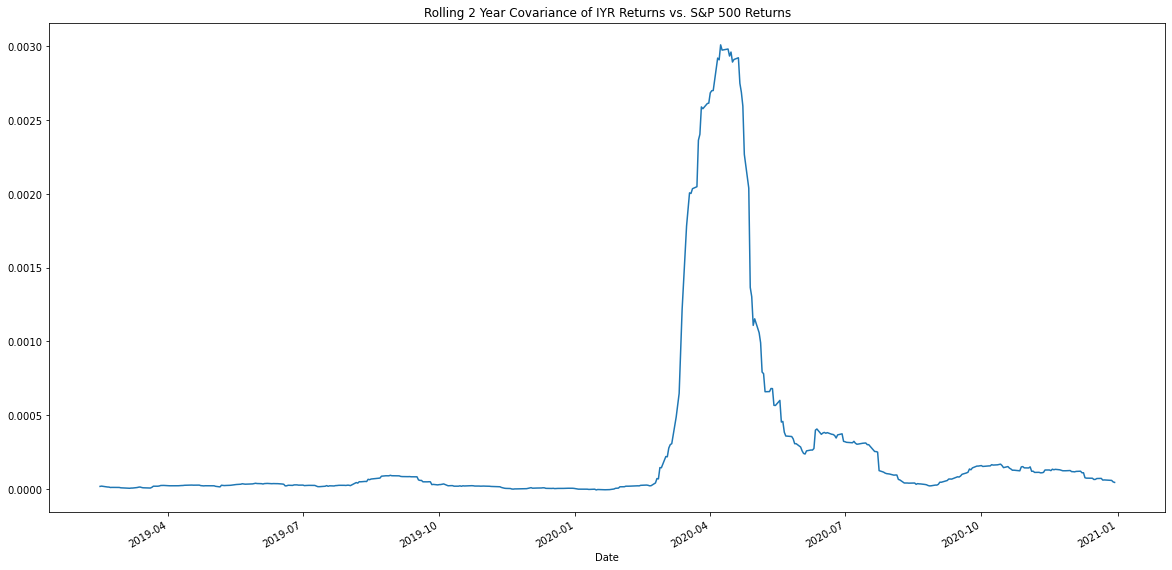

In [37]:
# Calculate 2 year rolling covariance of IYR vs. S&P 500 and plot the data
rolling_covariance = daily_returns['IYR'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 2 Year Covariance of IYR Returns vs. S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 2 Year Variance of S&P 500 Returns'}, xlabel='Date'>

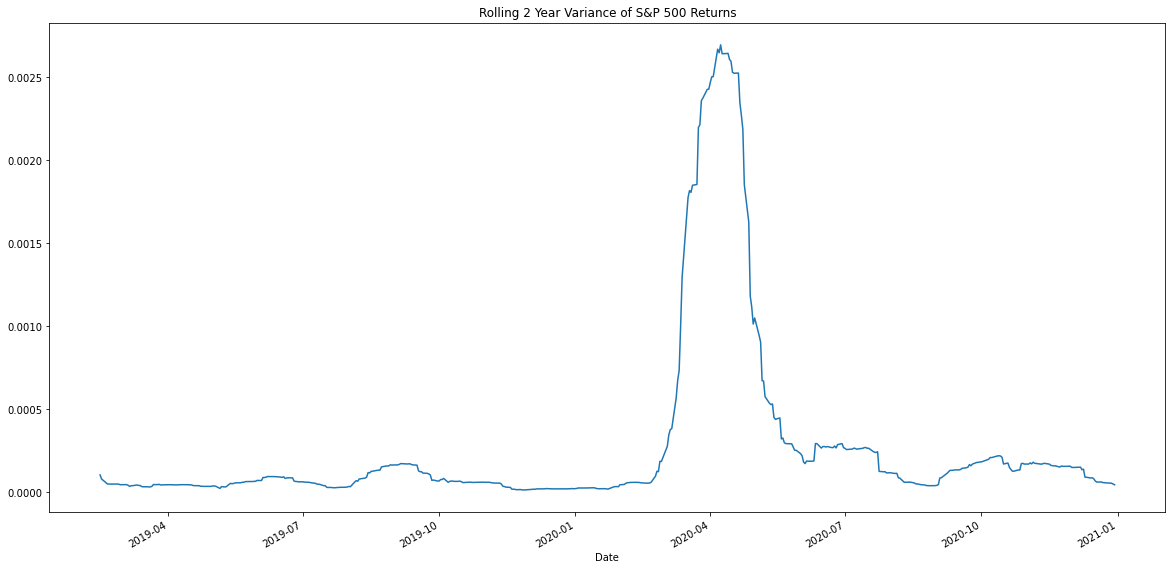

In [38]:
# Calculate 2 year rolling variance of IYR vs. S&P 500 and plot the data
rolling_variance = daily_returns['S&P 500'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 2 Year Variance of S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 2 Year Beta of IYR'}, xlabel='Date'>

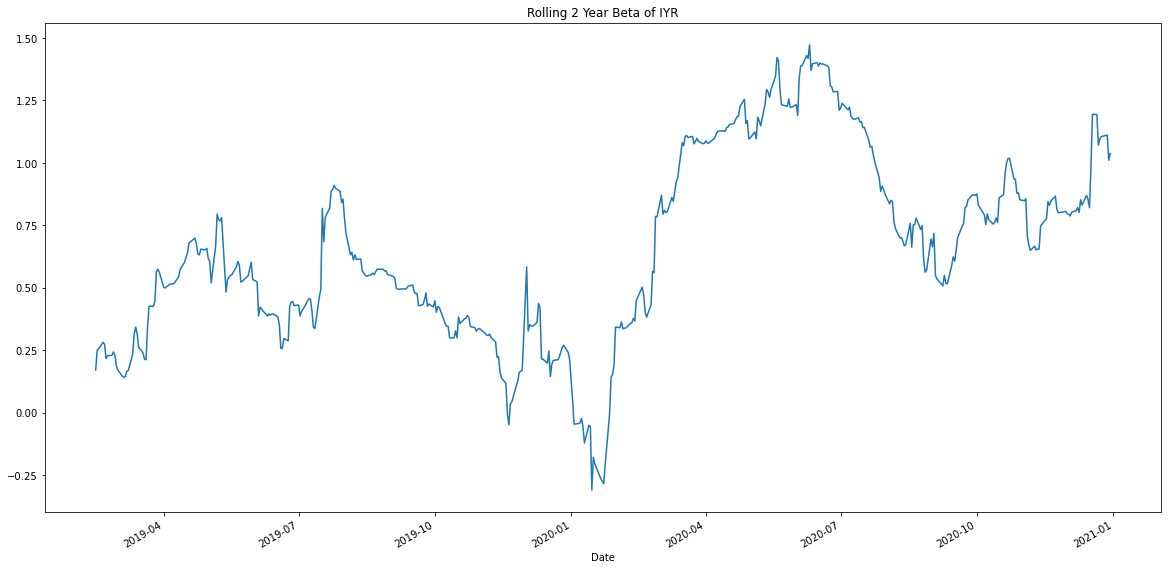

In [39]:
# Calculate 2 year rolling beta of IYR and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 2 Year Beta of IYR')

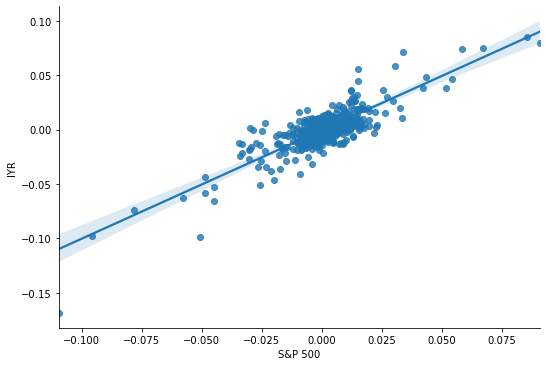

In [40]:
# Showcase beta vs. correlation by plotting a scatterplot using the Seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='S&P 500', y='IYR', data=daily_returns, aspect=1.5, fit_reg=True)

In [41]:
 iyr_beta

0.9982600500428693

In [42]:
 daily_returns.corr(method="pearson")

,IYR,S&P 500
IYR,1.000000,0.840351
S&P 500,0.840351,1.000000
